In [ ]:
import pandas as pd
from google.colab import drive

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Au_nanoparticle_dataset.csv')



In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Au_nanoparticle_dataset.csv')  # change path accordingly
cols = ['N_total', 'N_bulk', 'N_surface', 'R_avg']       # verify these exact names with df.columns
new_df = df[cols].copy()


In [ ]:
new_df.head(20)


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [ ]:
# quick summary
summary = new_df.describe().loc[['mean','std','25%','50%','75%']]
print(summary)

# or explicit quartiles
quartiles = new_df.quantile([0.25, 0.5, 0.75])
print(quartiles)


          N_total       N_bulk   N_surface      R_avg
mean  3476.786500  2521.550250   955.23625  20.654363
std   3679.286769  2976.232459   721.87022   7.610716
25%   1061.000000   618.750000   437.00000  15.160725
50%   1867.000000  1199.000000   666.00000  18.629250
75%   4503.000000  3183.000000  1301.75000  25.525125
      N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


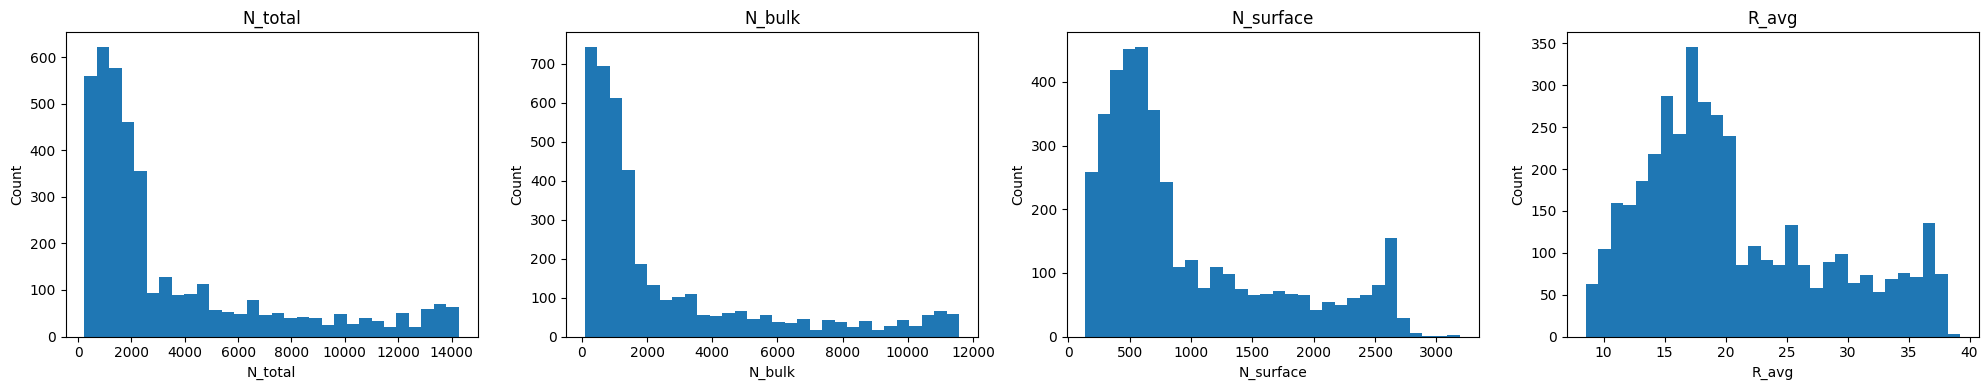

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(20,4))
for ax, col in zip(axes, cols):
    ax.hist(new_df[col].dropna(), bins=30)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


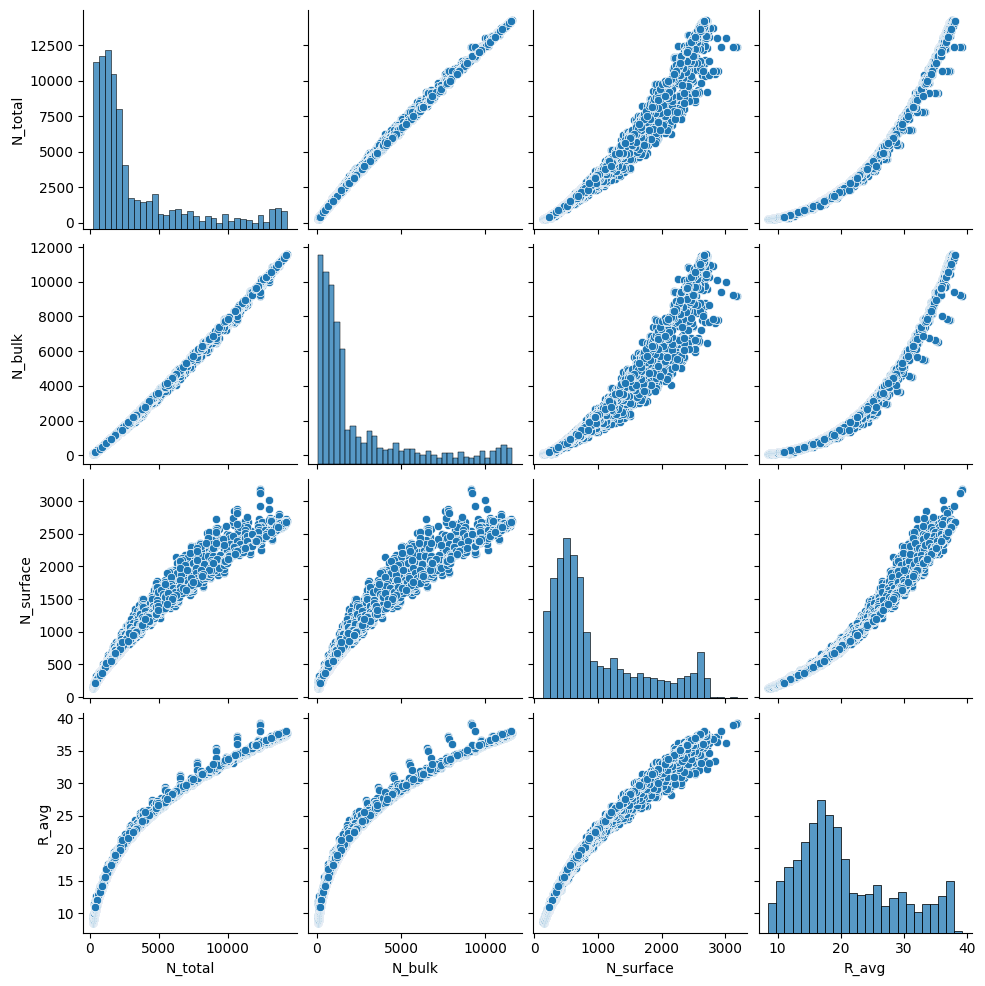

In [ ]:
import seaborn as sns
sns.pairplot(new_df, diag_kind='hist')  # simple pairplot: hist on diagonal, scatter off-diagonal
plt.show()


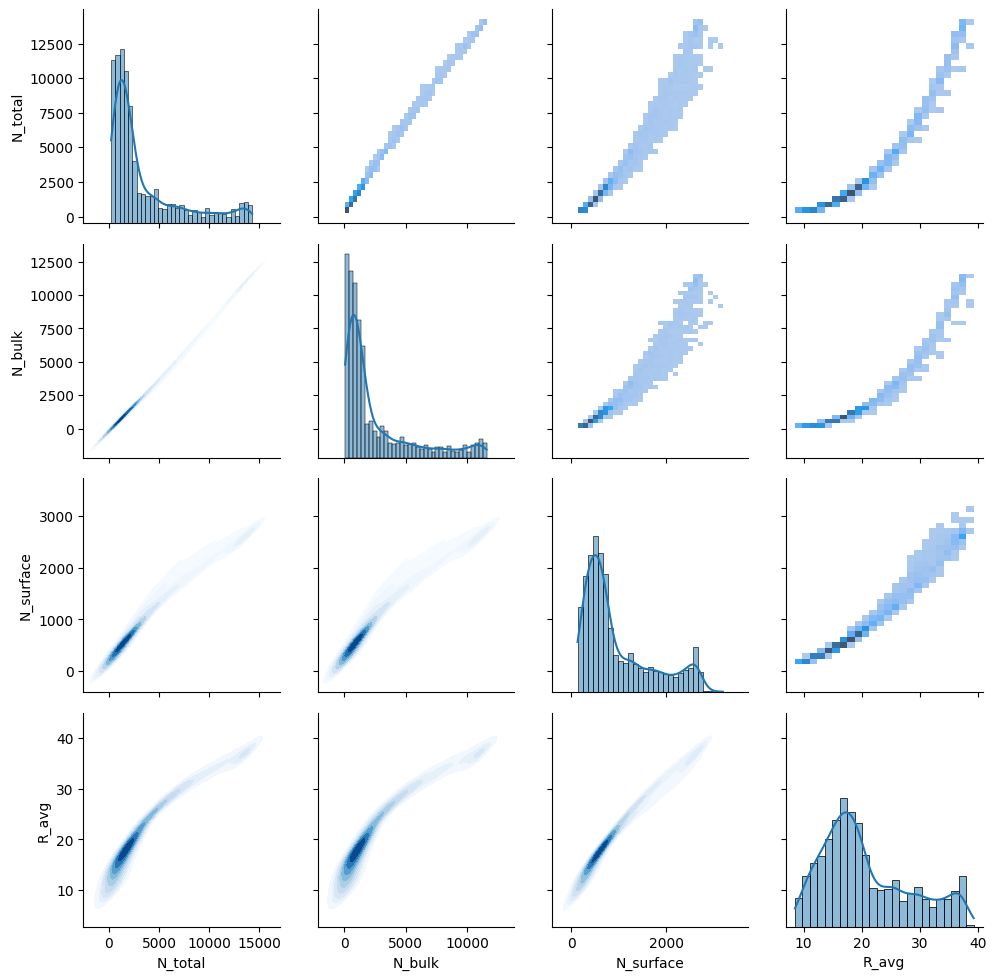

In [ ]:
# Custom PairGrid plots
g = sns.PairGrid(new_df)

# Upper: bivariate histogram
g.map_upper(sns.histplot)

# Diagonal: histogram + KDE
g.map_diag(sns.histplot, kde=True)

# Lower: bivariate KDE plot
g.map_lower(sns.kdeplot, fill=True, cmap="Blues")

plt.show()